## This notebook calls the module 'Observatory_popcorr_twostims_comparisons_loop.py' to loop over all visual areas and all cre-lines and compare the population correlation of Stim 1 (drifting_gratings) to stim 2 (natural movie three_2).

## It then produces a population plot.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pylab
import seaborn as sns
sns.set(style="white")
import pandas as pd
#our modules
import cobra_analysis
import allen_data_fetch
import Observatory_popcorr_twostims_comparisons_loop as obs

In [5]:
#Loop over areas and cre_lines to get rsquared values for each stim 1 vs stim 2 comparison

structure_ids= ['VISpm', 'VISp', 'VISal', 'VISl']
cre_lines = ['Rbp4-Cre', 'Scnn1a-Tg3-Cre', 'Rorb-IRES2-Cre', 'Cux2-CreERT2']

session_idx1=0
stim_type1 = 'natural_movie_three' # also plot 3 three_two
stim_type2 = 'drifting_gratings' #'drifting_gratings'

results_file = 'regions_cre_rsquared.pkl'
if not os.path.isfile(results_file):
    rsquared_dict = {}
    for structure_name in structure_ids:
        rsquared_dict_cre = {}
        for cre_line in cre_lines:
            # rsquared_dict_cre[cre_line] = np.random.randn(4)
            rsquared_dict_cre[cre_line] = np.array(obs.get_rsquared_structure(structure_name, cre_line, session_idx1, stim_type1, stim_type2))
        rsquared_dict[structure_name] = rsquared_dict_cre
    print rsquared_dict
    pickle.dump(rsquared_dict, open(results_file, "w"))
else:
    rsquared_dict = pickle.load(open(results_file, "r"))

Experiment container info:
[{'targeted_structure': u'VISpm', 'imaging_depth': 375, 'age_days': 80.0, 'id': 511511015, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISpm', 'imaging_depth': 375, 'age_days': 80.0, 'id': 511511015, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']



/Users/madsarv/anaconda/lib/python2.7/site-packages/matplotlib/tight_layout.py:225: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


Experiment container info:
[{'targeted_structure': u'VISpm', 'imaging_depth': 375, 'age_days': 97.0, 'id': 511510653, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISpm', 'imaging_depth': 375, 'age_days': 97.0, 'id': 511510653, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISpm', 'imaging_depth': 375, 'age_days': 133.0, 'id': 511510658, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISpm', 'imaging_depth': 375, 'age_days': 133.0, 'id': 511510658, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'n

/Users/madsarv/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 375, 'age_days': 133.0, 'id': 511510896, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 375, 'age_days': 133.0, 'id': 511510896, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 375, 'age_days': 86.0, 'id': 511510758, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 375, 'age_days': 86.0, 'id': 511510758, 'cre_line': u'Rbp4-Cre'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natur

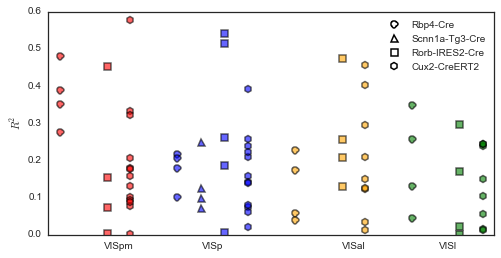

In [8]:
#ls *pkl

#now plot
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,4))
symbols = ['o', '^', 's', 'h']
colors = ['red', 'blue', 'orange', 'green']
for i, structure_name in enumerate(structure_ids):
    for j, cre_line in enumerate(cre_lines):
        values = rsquared_dict[structure_name][cre_line]
        ax.plot((i * 5 + j) * np.ones(values.size), values, symbols[j], color=colors[i], markerfacecolor=colors[i],
               markeredgewidth=1.5, alpha=0.6)
for j, cre_line in enumerate(cre_lines):
    ax.plot([-1], [0.2], symbols[j], markerfacecolor='none', markeredgewidth=1.5, label=cre_lines[j])
ax.legend()
ax.set_xticks([2.5, 6.5, 12.5, 16.5])
ax.set_xticklabels(structure_ids)
ax.set_xlim([-0.5, 18.5])
ax.set_ylabel(r'$R^2$')
plt.show()
